## power spectrum and wavelet analysis

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss
import xarray as xr
import math 
import pandas as pd
import matplotlib.cm as cm
from matplotlib import *
import scipy as sc
from scipy.stats import t,norm
from scipy import stats,signal
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal

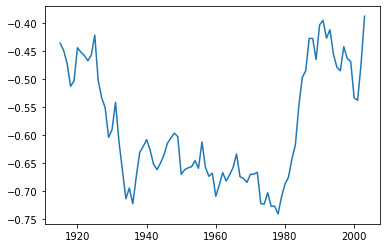

In [2]:
data1 = "/home/cccr/roxy/athira/fldmeanimd.nc"
data = "/home/cccr/roxy/athira/sstfld.nc"
a = xr.open_dataset(data1)

b= xr.open_dataset(data)

sst1 = b.sst.sel(time=slice('1901-06-01','2018-09-30'))
nino34=signal.detrend(sst1.squeeze())

rain1 = a.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_all_india = signal.detrend(rain1.squeeze())
ccor_all_india = np.zeros(89)

for k in range(0, 89):
    temrain   =  signal.detrend(rain_all_india[k:k+30])
    temsst    =  signal.detrend(nino34[k:k+30])
    ccor_all_india[k] = np.corrcoef(temrain,temsst)[0,1]
    
         
plt.plot(np.arange(1915,2004,1),ccor_all_india)


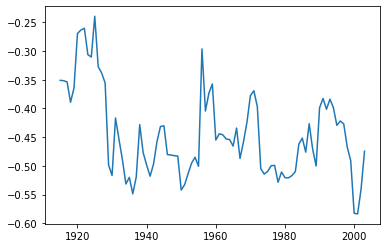

In [3]:
data2 = "/home/cccr/roxy/athira/southbox_imd_V2.nc"
a1 = xr.open_dataset(data2)



rain2 = a1.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_south_india=signal.detrend(rain2.squeeze())

ccor_south_india = np.zeros(89)
for k in range(0, 89):
    temprain=signal.detrend(rain_south_india[k:k+30])
    tempsst= signal.detrend(nino34[k:k+30])
    ccor_south_india[k] = np.corrcoef(temprain,tempsst)[0,1]
plt.plot(np.arange(1915,2004,1),ccor_south_india)




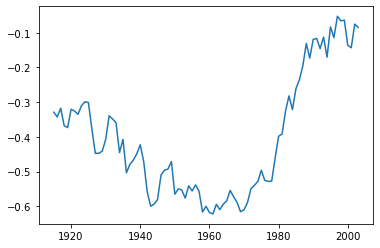

In [4]:
data3 = "/home/cccr/roxy/athira/centralbox_imd_V2.nc"
a2 = xr.open_dataset(data3)



rain3 = a2.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_central_india=signal.detrend(rain3.squeeze())

ccor_central_india = np.zeros(89)
for k in range(0, 89):
    temrain = signal.detrend(rain_central_india[k:k+30])
    temsst  = signal.detrend(nino34[k:k+30])
    ccor_central_india[k] = np.corrcoef(temrain,temsst)[0,1]
    
         
plt.plot(np.arange(1915,2004,1),ccor_central_india)



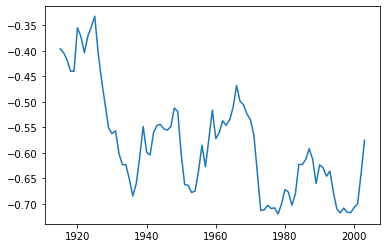

In [5]:
data4 = "/home/cccr/roxy/athira/northbox_imd_V2.nc"
a3 = xr.open_dataset(data4)



rain4 = a3.rf.sel(time=slice('1901-06-01','2018-09-30'))
rain_north_india=signal.detrend(rain4.squeeze())
ccor_north_india = np.zeros(89)

for k in range(0, 89):
    temrain  =  signal.detrend(rain_north_india[k:k+30])
    temsst   =   signal.detrend(nino34[k:k+30])
    ccor_north_india[k] = np.corrcoef(temrain,temsst)[0,1]
    
         
plt.plot(np.arange(1915,2004,1),ccor_north_india)


#plt.savefig('Desktop/DATA' +'panelruncorr.png',  bbox_inches='tight', pad_inches=0.5, dpi=150)

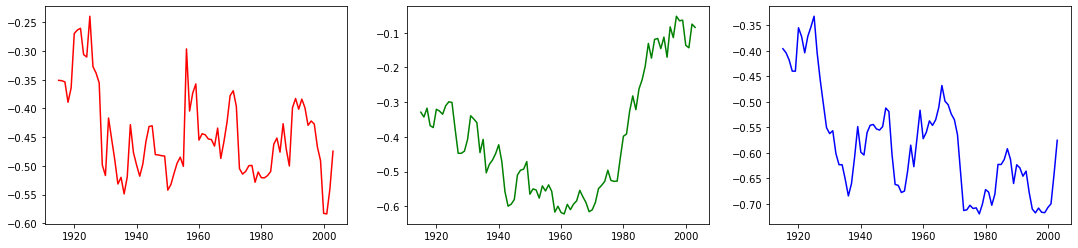

In [6]:
fig, axiom = plt.subplots(1,3)
axiom[0].plot(np.arange(1915,2004,1),ccor_south_india,'r')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india,'g')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india,'b')
fig.subplots_adjust(right=2.5)
plt.subplots_adjust(hspace=1)
# plt.savefig('Desktop/DATA' +'threebox30yrnew.png',  bbox_inches='tight', pad_inches=0.5, dpi=150)

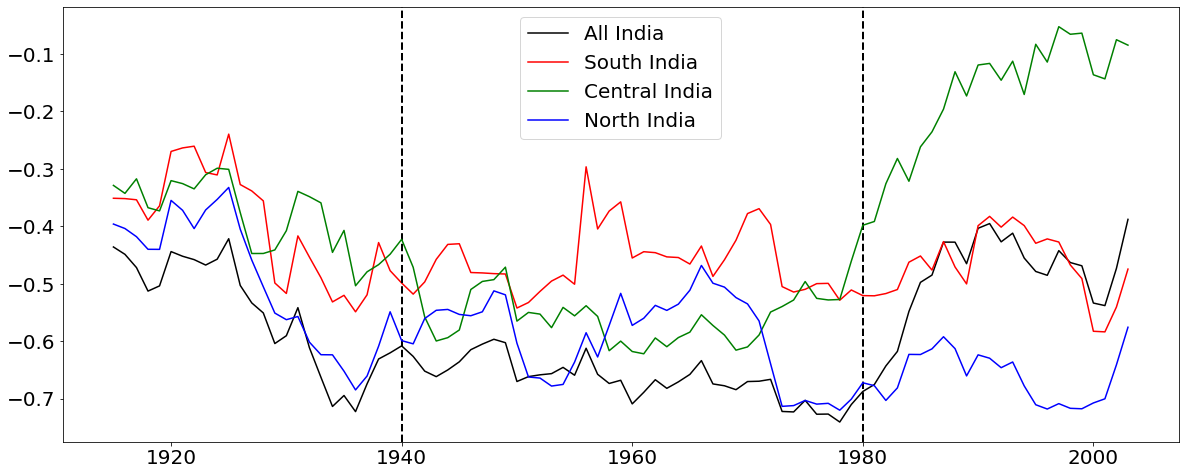

In [7]:
plt.figure(figsize=(20,8))
plt.rcParams['font.size']=20

plt.plot(np.arange(1915,2004,1),ccor_all_india, 'k', label ='All India')
plt.plot(np.arange(1915,2004,1),ccor_south_india, 'r', label ='South India')

plt.axvline(x=1940, color='k',linestyle='--',linewidth=2)
plt.axvline(x=1980, color='k',linestyle='--',linewidth=2)

plt.legend(loc="best")
plt.plot(np.arange(1915,2004,1),ccor_central_india, 'g', label ='Central India')
plt.legend(loc="best")
plt.plot(np.arange(1915,2004,1),ccor_north_india, 'b', label ='North India')
plt.legend(loc="best")
# plt.savefig('Desktop/DATA' +'threeboxcombined30yrnew.png',  bbox_inches='tight', pad_inches=0.5, dpi=150)

## PC running correlation

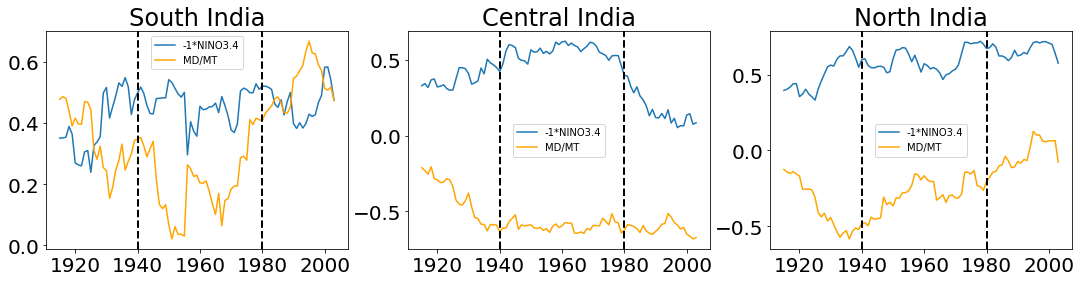

In [8]:
pc   =  xr.open_dataset('/home/cccr/roxy/athira/pc.yearmean.nc')
pc1  =  pc.sel(mode=0)['pcs'].values[:-1]
pc2  =  pc.sel(mode=1)['pcs'].values[:-1]

ccor_north_india_pc2 = np.zeros(89)
for k in range(0, 89):
    temrain  =   signal.detrend(rain_north_india[k:k+30])
    temsst   =   signal.detrend(pc2[k:k+30])
    ccor_north_india_pc2[k] = np.corrcoef(temrain,temsst)[0,1]



ccor_central_india_pc2 = np.zeros(89)
for k in range(0, 89):
    temrain = signal.detrend(rain_central_india[k:k+30])
    temsst  = signal.detrend(pc2[k:k+30])
    ccor_central_india_pc2[k] = np.corrcoef(temrain,temsst)[0,1]

ccor_south_india_pc2 = np.zeros(89)
for k in range(0, 89):
    temprain=signal.detrend(rain_south_india[k:k+30])
    tempsst= signal.detrend(pc2[k:k+30])
    ccor_south_india_pc2[k] = np.corrcoef(temprain,tempsst)[0,1]
    
         
fig, axiom = plt.subplots(1,3)

axiom[0].plot(np.arange(1915,2004,1),-1*ccor_south_india,'C0',label='-1*NINO3.4')
axiom[1].plot(np.arange(1915,2004,1),-1*ccor_central_india,'C0',label='-1*NINO3.4')
axiom[2].plot(np.arange(1915,2004,1),-1*ccor_north_india,'C0',label='-1*NINO3.4')

axiom[0].plot(np.arange(1915,2004,1),ccor_south_india_pc2,'orange',label='MD/MT')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india_pc2,'orange',label='MD/MT')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india_pc2,'orange',label='MD/MT')


axiom[0].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[0].axvline(x=1980, color='k',linestyle='--',linewidth=2)
axiom[1].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[1].axvline(x=1980, color='k',linestyle='--',linewidth=2)
axiom[2].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[2].axvline(x=1980, color='k',linestyle='--',linewidth=2)

axiom[0].legend(fontsize=10);axiom[1].legend(fontsize=10);axiom[2].legend(fontsize=10)
axiom[0].set_title('South India')
axiom[1].set_title('Central India')
axiom[2].set_title('North India')

fig.subplots_adjust(right=2.5)
plt.subplots_adjust(hspace=1)

### storing 

In [9]:
%store ccor_south_india
%store ccor_central_india
%store ccor_north_india
%store ccor_south_india_pc2
%store ccor_central_india_pc2
%store ccor_north_india_pc2
%store rain_north_india
%store rain_central_india
%store rain_south_india

Stored 'ccor_south_india' (ndarray)
Stored 'ccor_central_india' (ndarray)
Stored 'ccor_north_india' (ndarray)
Stored 'ccor_south_india_pc2' (ndarray)
Stored 'ccor_central_india_pc2' (ndarray)
Stored 'ccor_north_india_pc2' (ndarray)
Stored 'rain_north_india' (ndarray)
Stored 'rain_central_india' (ndarray)
Stored 'rain_south_india' (ndarray)


# Power Spectrum 

In [10]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2
from scipy import signal
import math

def spec(sig,sample_freq,window_type,alpha,**kwargs):
    ##https://www1.udel.edu/biology/rosewc/kaap686/notes/windowing.html
    ## Environmental data analysis with MATLAB-William Menke & Jashua Menke

    ##************************ signal must have even length.************##
    ## window=0 'no window'
    ## window=1 'Hamming window'
    ## window=2 'Hanning window'
    
    N=len(sig)                          #     no of points N
    Dt=sample_freq*1                       # sample frequency /rate
    T=N*Dt;                    
    fmax=1/(2*Dt);                         #     Nyquist (maximum) frequency,
    Df =fmax/(N/2);                        #     frequency interval,
    Nf=N/2+1;                              #     number of non-negative frequencies,#     frequency vector , #f=Df*[0:N/2,-N/2þ1:-1]’; 
    sig=sig-np.mean(sig)
    
    if window_type==1:
        w1=0.54-0.46*np.cos(2*np.pi*np.arange(N)/(N-1)) ## hamming window weight
    elif window_type==2:
        w1=0.5-0.5*np.cos(2*np.pi*np.arange(N)/(N-1)) ## hanning window weight
    else:
        w1=1
    
    signal1=w1*sig
    temp_fft = Dt*sc.fftpack.fft(signal1)
    fftfreq = np.fft.fftfreq(N,Dt)         # daily data it is 1./365 ## monthly data 1./12 ## yearly data=1
    temp_psd = temp_fft*np.conj(temp_fft)*(2/T)
    f = fftfreq[(fftfreq >= 0) |(fftfreq==-fmax)]
    f[-1]=-1*f[-1]
    p = temp_psd[(fftfreq >= 0) | (fftfreq==-fmax)]
    
    #Null Hypothesis: time series is uncorrelated random noise
    sd2est=np.std(sig);                   #   variance of time series,
    ff=np.sum(w1*w1)/N;                        #   power in window function, 
    c = (ff*sd2est)/(2*Nf*Df);               #   scaling constant,  
    cl95 = c*chi2.ppf(1.0-alpha, df=2);           #   95% confidence level,
    
    if len(kwargs)!=0:
        for item,values in kwargs.items():
            ax=values
            ax.plot(1/f,p)
            ax.set_xscale('log')
            ax.axhline(y=cl95,color='r', linestyle='--')
            ax.set_xlabel('Time Period (year)')
            ax.set_ylabel('PSD (dB)')
            ax.grid()

    return p,f,cl95

In [11]:
p_south,f,cl951 = spec(rain_south_india,sample_freq=1,window_type='hanning',alpha=0.05)
p_central,f,cl952 = spec(rain_central_india,sample_freq=1,window_type='hanning',alpha=0.05)
p_north,f,cl953 = spec(rain_north_india,sample_freq=1,window_type='hanning',alpha=0.05)

/tmp/ipykernel_60478/2448883063.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(1/f,p_south,'r',label='south',)
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_60478/2448883063.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(1/f,p_central,'g',label ='central')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_60478/2448883063.py:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(1/f,p_north,'b',label='north')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWa

Text(0, 0.5, 'Power/Frequency')

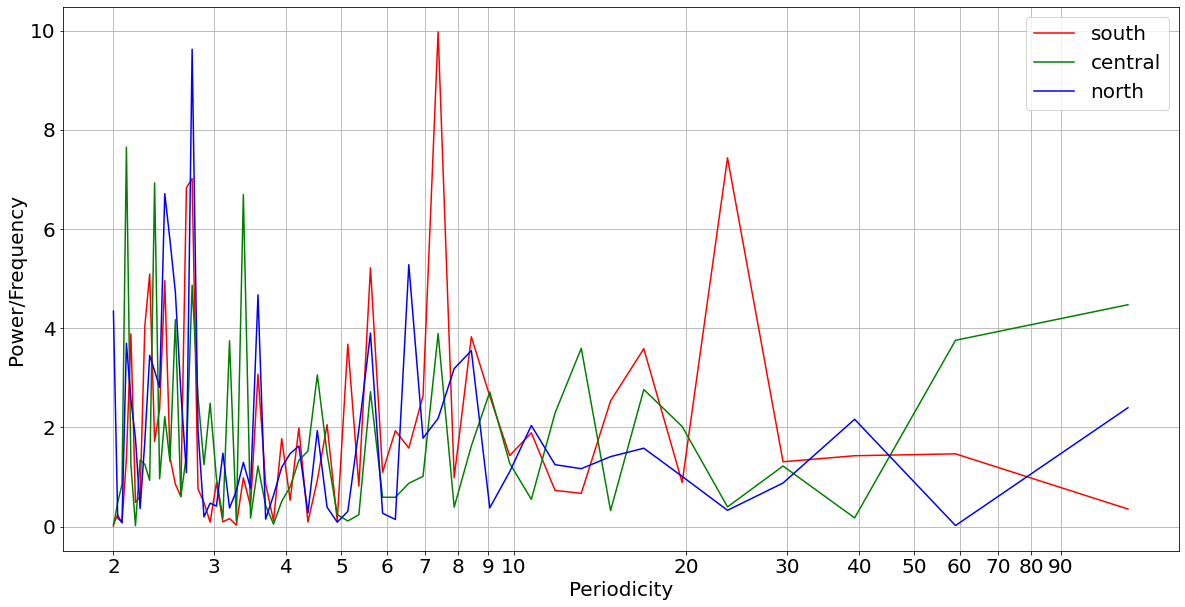

In [12]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20

plt.semilogx(1/f,p_south,'r',label='south',)
plt.semilogx(1/f,p_central,'g',label ='central')
plt.semilogx(1/f,p_north,'b',label='north')

s = [2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]
s1 = [str(i) for i in s]
plt.xticks(s,s1)
plt.legend()
plt.grid()
plt.xlabel('Periodicity')
plt.ylabel('Power/Frequency')
# plt.savefig('Desktop/DATA' +'powerspectrum.png',  bbox_inches='tight', pad_inches=0.5, dpi=150)

## wavelet Analysis

In [13]:
from waveletFunctions import wavelet, wave_signif
from matplotlib.gridspec   import GridSpec

In [14]:
def draw_wavelet(T,variance,ax,title):
    n    = len(T)                             # Number of data points
    dt   = 1                                    # Data sampling rate (here seasonal data)
    time = np.arange(len(T)) * dt + 1901.0    # construct time array

    xlim = ([1901, 2018])
    pad  = 1                                # pad the time series with zeroes (recommended)
    dj   = 1/8                              # this will do 8 sub-octaves per octave
    s0   = 2 * dt                           # this says start at a scale of 6 months
    j1   = np.fix(np.log2(n*dt/s0) / dj)    # this says do 7 powers-of-two with dj sub-octaves each
    lag1 = np.corrcoef(T[:-1],T[1:])[0,1]                             # lag-1 autocorrelation for red noise background
    mother = 'MORLET'  
    # Wavelet transform:
    wave, period, scale, coi = wavelet(T, dt, pad, dj, s0, j1, mother)
    power                    = (np.abs(wave)) ** 2  # compute wavelet power spectrum
    global_ws                = (np.sum(power, axis=1) / n)  # time-average over all times
    # Significance levels:
    signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
        lag1=lag1, mother=mother)
    sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand signif --> (J+1)x(N) array
    sig95 = power / sig95  # where ratio > 1, power is significant
    # Global wavelet spectrum & significance levels:
    dof = n - scale  # the -scale corrects for padding at edges
    global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,lag1=lag1, dof=dof, mother=mother)
    #--- Contour plot wavelet power spectrum
    
#     levels = [0, 0.5, 1, 2, 4,np.fix(power.max()+1)]
    levels =[0,1,2,3,4,5,6]
    CS = ax.contourf(time, period, power, levels,extend="max")  #*** or use 'contour'
    im = ax.contourf(CS,  colors=['white','bisque','orange','orangered','red','darkred'])
    ax.set_yscale('log', basey=2, subsy=None)
    ax.set_xlabel('Time (year)')
    ax.set_ylabel('Period (years)')
    ax.set_title(title)
    ax.set_xlim(xlim[:])
    
    # 95# significance contour, levels at -99 (fake) and 1 (95# signif)
    ax.contour(time, period, sig95, [-99, 1], colors='k')

    # cone-of-influence, anything "below" is dubious
    ax.plot(time, coi, 'k')

    # format y-scale
    ax.set_ylim([np.min(period), np.max(period)])
    ax.set_ylim([0,32])
    ax.invert_yaxis()
    return im
   
    
    
    

In [27]:
pc1_detrend=signal.detrend(pc1)

/tmp/ipykernel_60478/3488796454.py:31: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', basey=2, subsy=None)
/tmp/ipykernel_60478/3488796454.py:31: MatplotlibDeprecationWarning: The 'subsy' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', basey=2, subsy=None)
/tmp/ipykernel_60478/3488796454.py:45: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,32])
/tmp/ipykernel_60478/3488796454.py:31: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', basey=2, subsy=None)
/tmp/ipykernel_60478/3488796454.py:31: Matplo

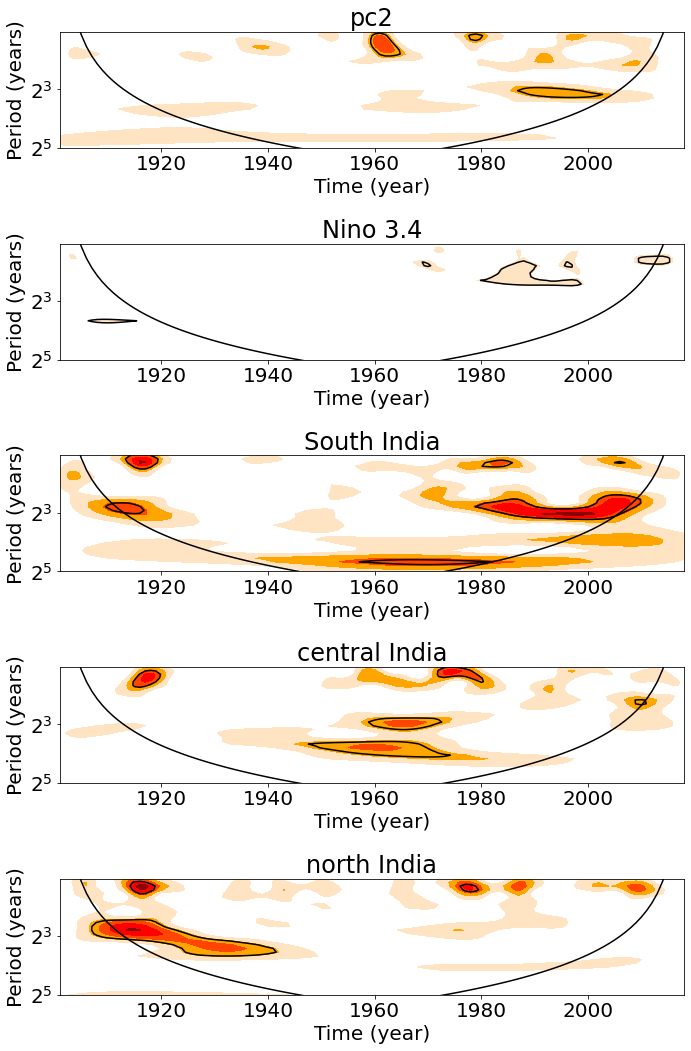

In [28]:
pc_all = xr.open_dataset("/home/cccr/roxy/athira/pc.yearmean.nc")
pc2=pc_all.pcs[:-1,1].values.squeeze()
pc2_detrend=signal.detrend(pc2)
pc2=(pc2_detrend-np.mean(pc2_detrend))
nino34 = nino34 - np.mean(nino34)

rain_south_india = rain_south_india-np.mean(rain_south_india)
rain_central_india = rain_central_india-np.mean(rain_central_india)
rain_north_india = rain_north_india-np.mean(rain_north_india)

variance_pc1 = np.std(pc1_detrend, ddof=1) ** 2
variance_pc2 = np.std(pc2_detrend, ddof=1) ** 2
variance_nino34 = np.std(nino34, ddof=1) ** 2
variance_south= np.std(rain_south_india, ddof=1) ** 2
variance_central = np.std(rain_central_india, ddof=1) ** 2
variance_north = np.std(rain_north_india, ddof=1) ** 2


fig,ax =plt.subplots(5,1,figsize=(10,15))
draw_wavelet(pc2_detrend,variance_pc2,ax[0],title= "pc2")
draw_wavelet(nino34,variance_nino34,ax[1],title= "Nino 3.4")
draw_wavelet(rain_south_india,variance_south,ax[2],title= "South India")
draw_wavelet(rain_central_india,variance_central,ax[3],title ="central India")
im = draw_wavelet(rain_north_india,variance_north,ax[4],title="north India")
plt.tight_layout()


In [24]:
p_south,f,cl951 = spec(rain_south_india,sample_freq=1,window_type='hanning',alpha=0.05)
p_central,f,cl952 = spec(rain_central_india,sample_freq=1,window_type='hanning',alpha=0.05)
p_north,f,cl953 = spec(rain_north_india,sample_freq=1,window_type='hanning',alpha=0.05)
p_nino,f,cl953 = spec(nino34,sample_freq=1,window_type='hanning',alpha=0.05)
p_pc2,f,cl953 = spec(pc2_detrend,sample_freq=1,window_type='hanning',alpha=0.05)
p_pc1,f,cl953 = spec(pc1_detrend,sample_freq=1,window_type='hanning',alpha=0.05)

## Combined plot

/tmp/ipykernel_60478/3856021831.py:3: RuntimeWarning: divide by zero encountered in true_divide
  ax[0,0].semilogx(1/f,p_pc2,'orange')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_60478/3856021831.py:10: RuntimeWarning: divide by zero encountered in true_divide
  ax[1,0].semilogx(1/f,p_nino,'k')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/tmp/ipykernel_60478/3856021831.py:15: RuntimeWarning: divide by zero encountered in true_divide
  ax[2,0].semilogx(1/f,p_south,'r')
/home/cccr/roxy/panini/anaconda3/envs/saranya1/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to

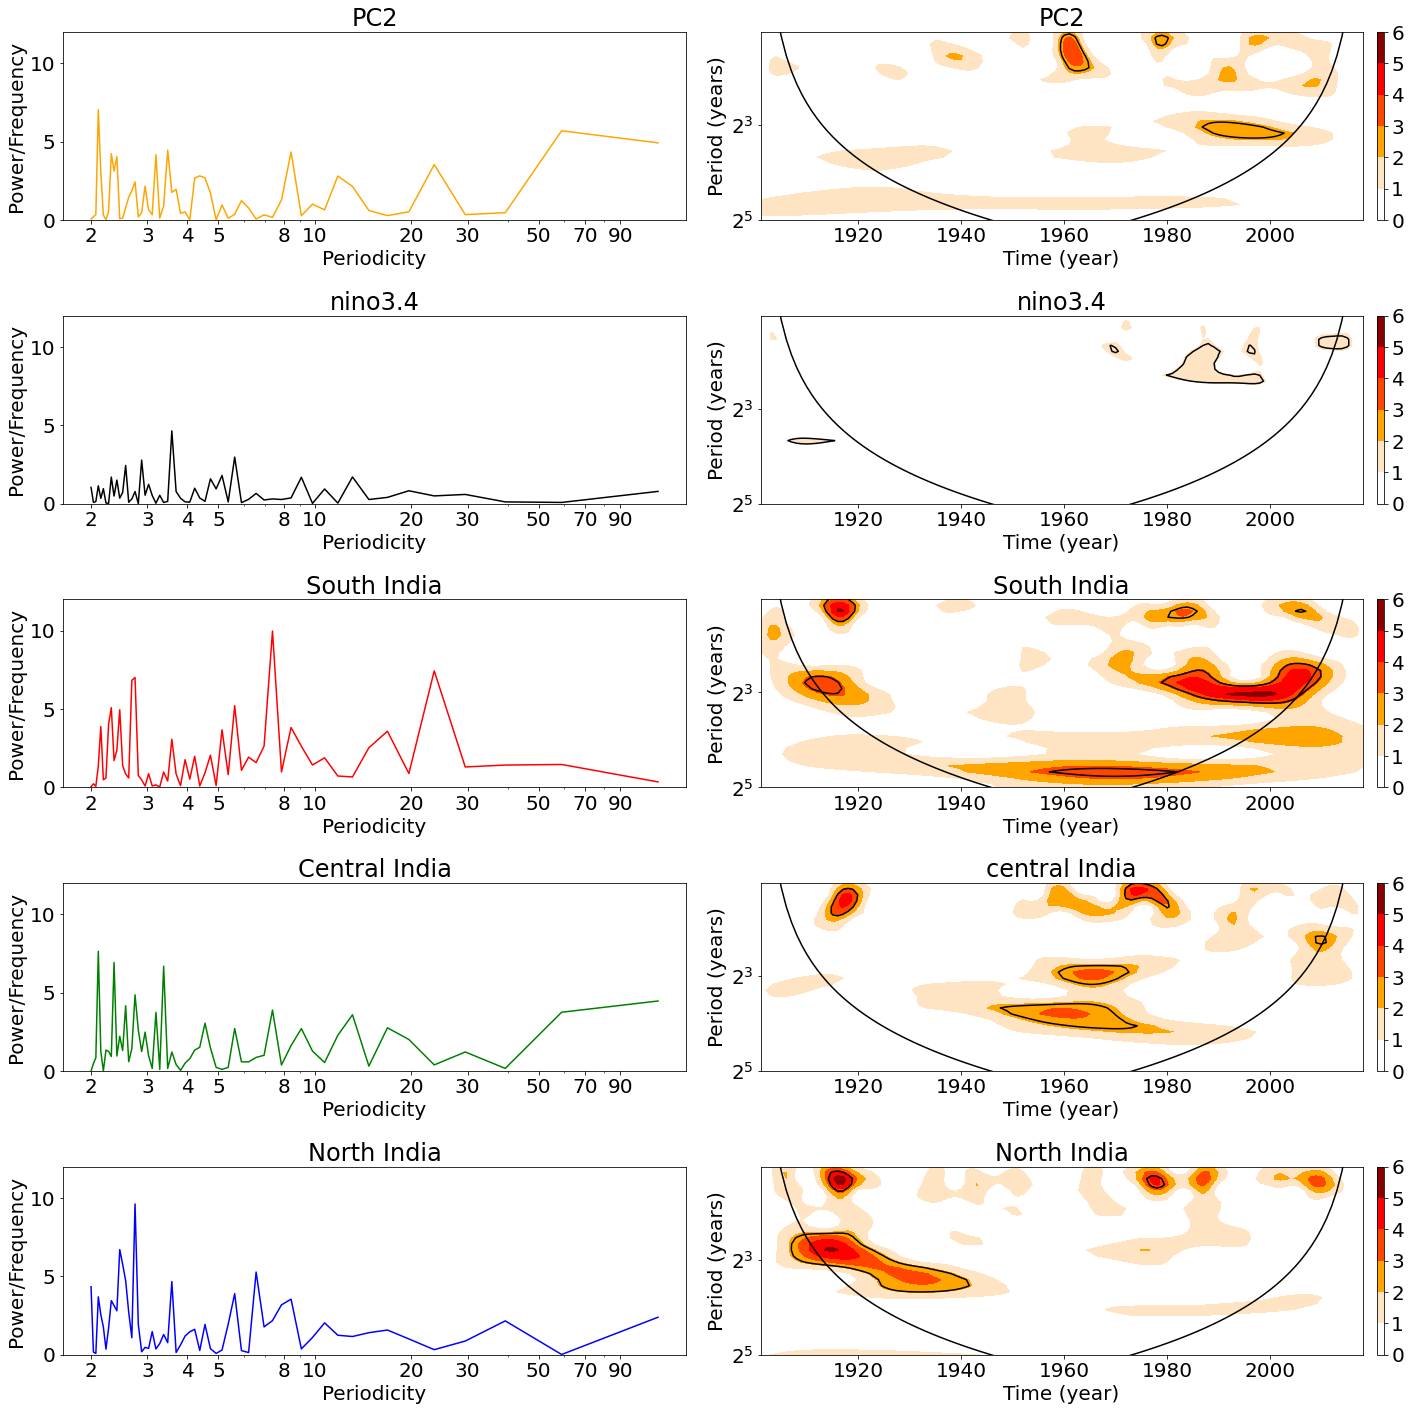

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax =plt.subplots(5,2,figsize=(20,20))
ax[0,0].semilogx(1/f,p_pc2,'orange')
ax[0,0].set_title("PC2")
s = [2,3,4,5,8,10,20,30,50,70,90]
s1 = [str(i) for i in s]
ax[0,0].set_xticks(s)
ax[0,0].set_xticklabels(s1)
ax[0,0].set_ylim([0,12])
ax[1,0].semilogx(1/f,p_nino,'k')
ax[1,0].set_title("nino3.4")
ax[1,0].set_xticks(s)
ax[1,0].set_xticklabels(s1)
ax[1,0].set_ylim([0,12])
ax[2,0].semilogx(1/f,p_south,'r')
ax[2,0].set_title("South India")
ax[2,0].set_xticks(s)
ax[2,0].set_xticklabels(s1)
ax[2,0].set_ylim([0,12])
ax[3,0].semilogx(1/f,p_central,'g')
ax[3,0].set_xticks(s)
ax[3,0].set_xticklabels(s1)
ax[3,0].set_ylim([0,12])
ax[3,0].set_title("Central India")

ax[4,0].semilogx(1/f,p_north,'b')
ax[4,0].set_xticks(s)
ax[4,0].set_xticklabels(s1)
ax[4,0].set_ylim([0,12])
ax[4,0].set_title("North India")

for i in np.arange(5):
    ax[i,0].set_xlabel('Periodicity')
    ax[i,0].set_ylabel('Power/Frequency')

im1 = draw_wavelet(pc2_detrend,variance_pc2,ax[0,1],title ="PC2")
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im1, cax=cax)

im2 = draw_wavelet(nino34,variance_nino34,ax[1,1],title ="nino3.4")
divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im2, cax=cax)

im3 = draw_wavelet(rain_south_india,variance_south,ax[2,1],title ="South India")
divider = make_axes_locatable(ax[2,1])
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im3, cax=cax)

im4 = draw_wavelet(rain_central_india,variance_central,ax[3,1],title="central India" )
divider = make_axes_locatable(ax[3,1])
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im4, cax=cax)

im5 = draw_wavelet(rain_north_india,variance_north,ax[4,1],title ="North India")
divider = make_axes_locatable(ax[4,1])
cax = divider.append_axes("right", 0.1, pad=0.2)
plt.colorbar(im5, cax=cax)

plt.tight_layout()
# plt.savefig('Desktop/DATA' +'wavelet.png',  bbox_inches='tight', pad_inches=0.5, dpi=150)


## storing 

In [29]:
%store rain_south_india
%store variance_south
%store rain_central_india
%store variance_central
%store rain_north_india
%store variance_north
%store p_south
%store f
%store p_central
%store p_north

%store p_nino
%store p_pc2
%store p_pc1
%store variance_nino34
%store variance_pc2
%store variance_pc1
%store pc2_detrend
%store pc1_detrend

%store nino34


Stored 'rain_south_india' (ndarray)
Stored 'variance_south' (float64)
Stored 'rain_central_india' (ndarray)
Stored 'variance_central' (float64)
Stored 'rain_north_india' (ndarray)
Stored 'variance_north' (float64)
Stored 'p_south' (ndarray)
Stored 'f' (ndarray)
Stored 'p_central' (ndarray)
Stored 'p_north' (ndarray)
Stored 'p_nino' (ndarray)
Stored 'p_pc2' (ndarray)
Stored 'p_pc1' (ndarray)
Stored 'variance_nino34' (float64)
Stored 'variance_pc2' (float64)
Stored 'variance_pc1' (float64)
Stored 'pc2_detrend' (ndarray)
Stored 'pc1_detrend' (ndarray)
Stored 'nino34' (ndarray)
